In [29]:
import glob
import json
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

In [30]:
# read in all the jason files under a directory as a list of dataframes
def read_json_files_as_df_list(path):
    cwd = os.getcwd()
    #combine cwd and path
    path = os.path.join(cwd, path)
    os.chdir(path)
    df_list = []
    for file in glob.glob("*.json"):
        df = pd.read_json(file, lines=True)
        df_list.append(df)
    os.chdir(cwd)
    return df_list

In [31]:
data=read_json_files_as_df_list('yelp-dataset/yelp_training_set')
business_df = data[0]
checkin_df = data[1]
review_df = data[2]
user_df = data[3]




In [32]:
#save a dataframe as a csv file
def save_df_as_csv(df, path):
    cwd = os.getcwd()
    #combine cwd and path
    path = os.path.join(cwd, path)
    df.to_csv(path, index=False)

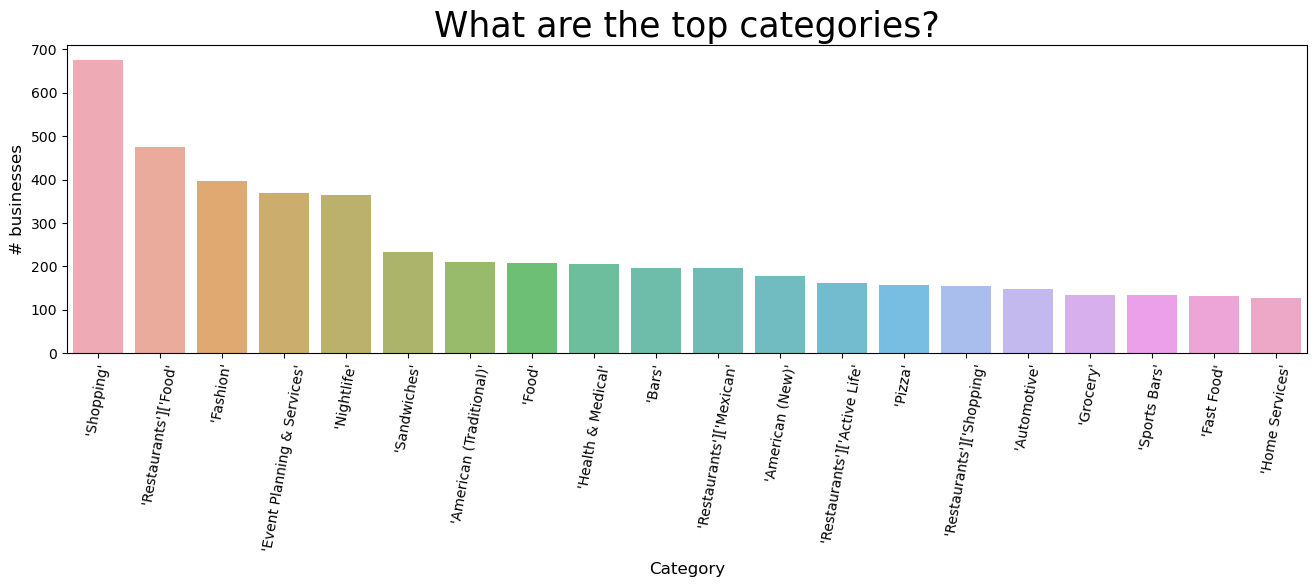

In [33]:
business_cats = ''.join(business_df['categories'].astype('str'))

cats=pd.DataFrame(business_cats.split(','),columns=['categories'])

#prep for chart
x=cats.categories.value_counts()

x=x.sort_values(ascending=False)
x=x.iloc[0:20]

#chart
plt.figure(figsize=(16,4))
ax = sns.barplot(x=x.index, y=x.values, alpha=0.8)
plt.title("What are the top categories?",fontsize=25)
locs, labels = plt.xticks()
plt.setp(labels, rotation=80)
plt.ylabel('# businesses', fontsize=12)
plt.xlabel('Category', fontsize=12)

#adding the text labels
# rects = ax.patches
# labels = x.values
# for rect, label in zip(rects, labels):
#     height = rect.get_height()
#     ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

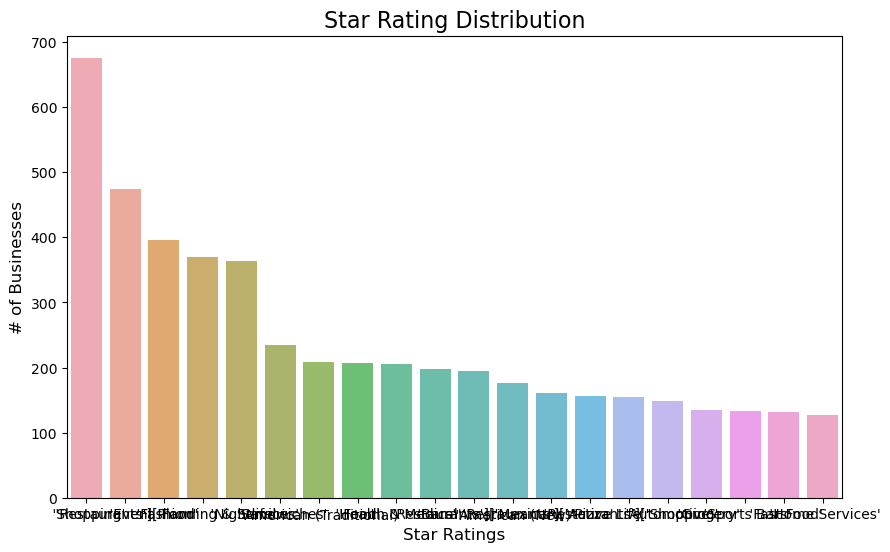

In [34]:
plt.figure(figsize=(10, 6))  # Adjusting figure size to match the earlier histogram
ax = sns.barplot(x=x.index, y=x.values, alpha=0.8)  # Using barplot for categorical data
plt.title("Star Rating Distribution", fontsize=16)
plt.ylabel('# of Businesses', fontsize=12)
plt.xlabel('Star Ratings', fontsize=12)
plt.xticks(rotation=0)  # Ensuring the x-axis labels are horizontal for readability
plt.show()

In [35]:
#count  different types of votes
review_df['funny_votes'] = review_df['votes'].apply(lambda x: x['funny'])  # Extracting the number of funny votes
review_df['useful_votes'] = review_df['votes'].apply(lambda x: x['useful'])  # Extracting the number of useful votes
review_df['cool_votes'] = review_df['votes'].apply(lambda x: x['cool'])  # Extracting the number of cool

# Adding a total votes column for convenience
review_df['total_votes'] = review_df['funny_votes'] + review_df['useful_votes'] + review_df['cool_votes']

#for user, count different types of votes they received
user_df['funny_votes_of_user'] = user_df['votes'].apply(lambda x: x['funny'])  # Extracting the number of funny votes
user_df['useful_votes_of_user'] = user_df['votes'].apply(lambda x: x['useful'])  # Extracting the number of useful votes
user_df['cool_votes_of_user'] = user_df['votes'].apply(lambda x: x['cool'])  # Extracting the number of cool

# Adding a total votes column for convenience
user_df['total_votes_of_user'] = user_df['funny_votes_of_user'] + user_df['useful_votes_of_user'] + user_df['cool_votes_of_user']


In [36]:
# Adding a review length column
review_df['review_length'] = review_df['text'].apply(len)

# Adding a sentiment score column
review_df['sentiment'] = review_df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

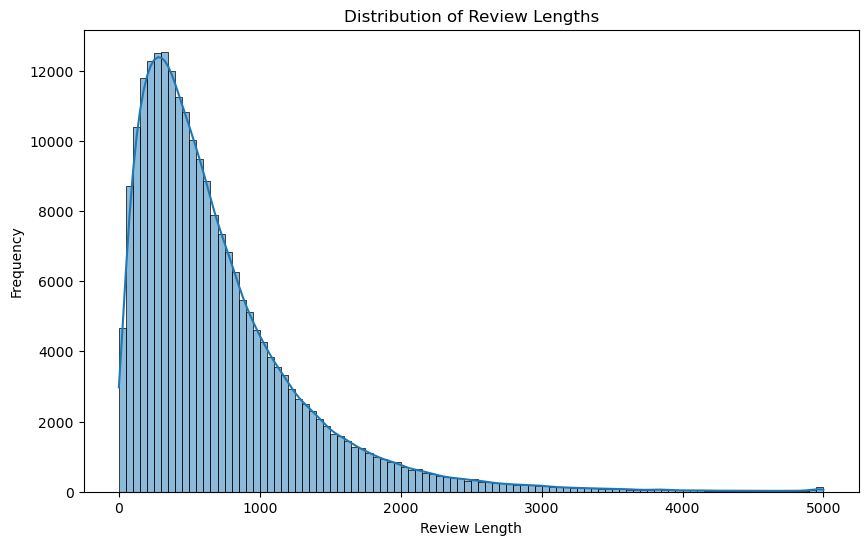

In [37]:
# Distribution of review lengths
plt.figure(figsize=(10, 6))
sns.histplot(review_df['review_length'], bins=100, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()



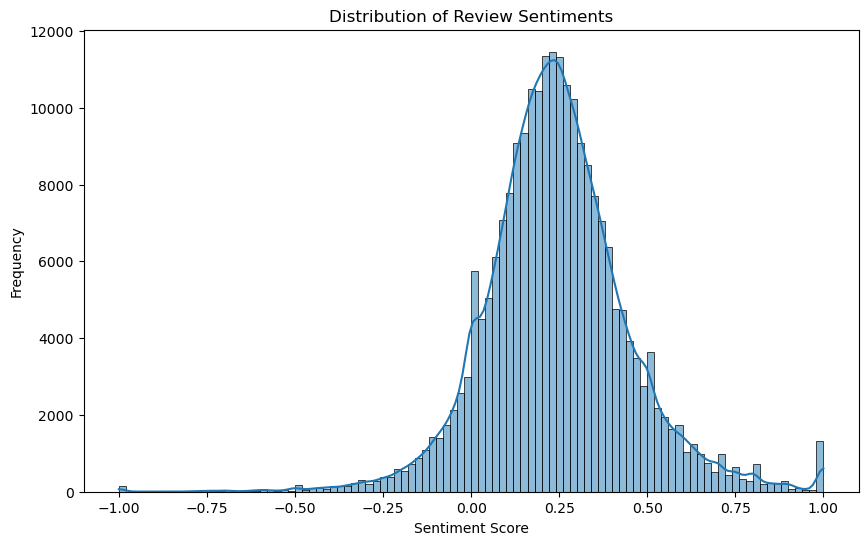

In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(review_df['sentiment'], bins=100, kde=True)
plt.title('Distribution of Review Sentiments')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='review_length', ylabel='total_votes'>

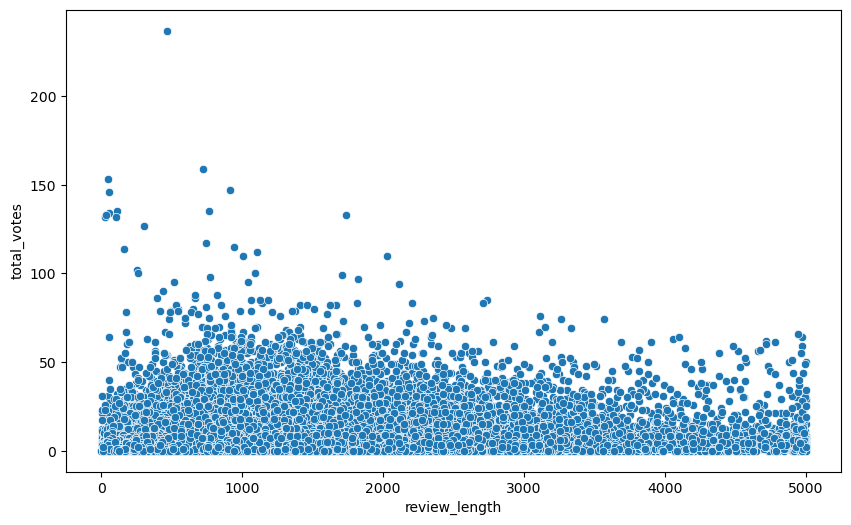

In [39]:
#relationship between review length and total votes
plt.figure(figsize=(10, 6))
sns.scatterplot(data=review_df, x='review_length', y='total_votes')

<Axes: xlabel='sentiment', ylabel='total_votes'>

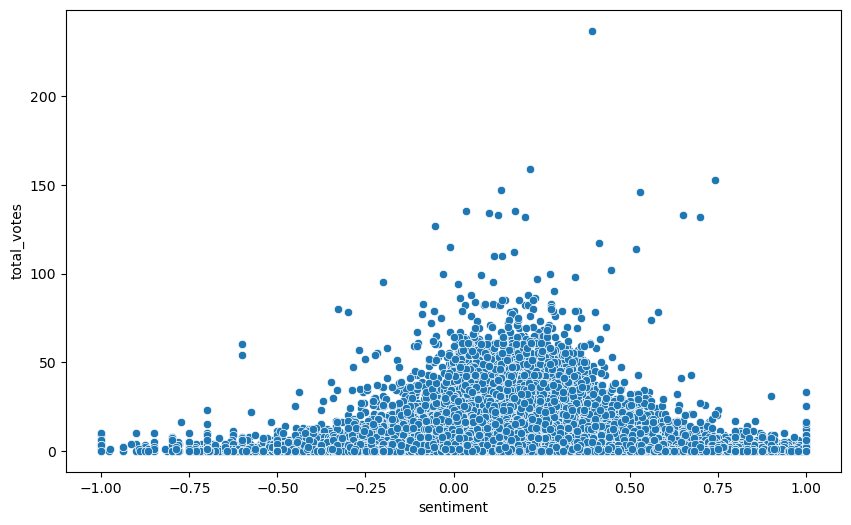

In [40]:
#relation between sentiment and total votes
plt.figure(figsize=(10, 6))
sns.scatterplot(data=review_df, x='sentiment', y='total_votes')

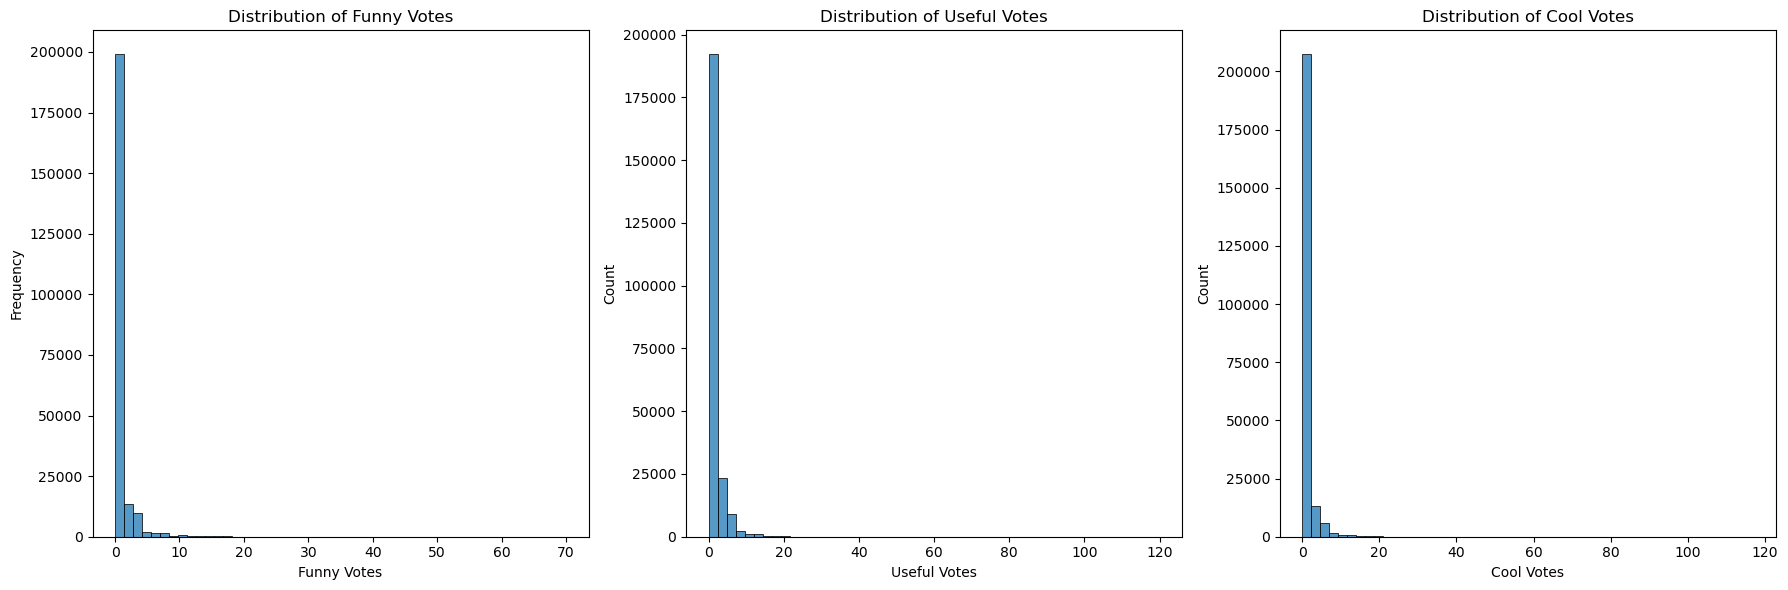

In [41]:
# Vote Type Distributions
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.histplot(review_df['funny_votes'], bins=50, kde=False)
plt.title('Distribution of Funny Votes')
plt.xlabel('Funny Votes')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.histplot(review_df['useful_votes'], bins=50, kde=False)
plt.title('Distribution of Useful Votes')
plt.xlabel('Useful Votes')

plt.subplot(1, 3, 3)
sns.histplot(review_df['cool_votes'], bins=50, kde=False)
plt.title('Distribution of Cool Votes')
plt.xlabel('Cool Votes')

plt.tight_layout()
plt.show()

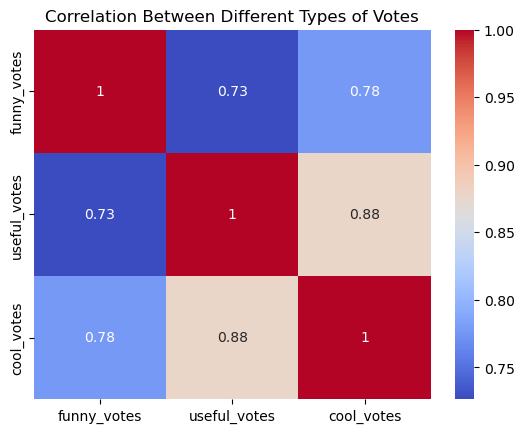

In [42]:
# Correlation Between Vote Types
vote_correlation = review_df[['funny_votes', 'useful_votes', 'cool_votes']].corr()
sns.heatmap(vote_correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Between Different Types of Votes')
plt.show()

In [43]:
business_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11537 entries, 0 to 11536
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   business_id    11537 non-null  object 
 1   full_address   11537 non-null  object 
 2   open           11537 non-null  bool   
 3   categories     11537 non-null  object 
 4   city           11537 non-null  object 
 5   review_count   11537 non-null  int64  
 6   name           11537 non-null  object 
 7   neighborhoods  11537 non-null  object 
 8   longitude      11537 non-null  float64
 9   state          11537 non-null  object 
 10  stars          11537 non-null  float64
 11  latitude       11537 non-null  float64
 12  type           11537 non-null  object 
dtypes: bool(1), float64(3), int64(1), object(8)
memory usage: 1.1+ MB


In [44]:
#rename columns
business_df.rename(columns={'stars':'business_stars'}, inplace=True)
review_df.rename(columns={'stars':'review_stars'}, inplace=True)

combined_df = pd.merge(review_df, user_df, on='user_id', how='left')
combined_df = pd.merge(combined_df, business_df[['business_id', 'business_stars', 'categories','open']], on='business_id', how='left')


drop_cols = ['review_id', 'user_id', 'business_id', 'votes_x', 'votes_y','type_x', 'type_y','name']
combined_df.drop(drop_cols, axis=1, inplace=True)




#turn open to 0 or 1
combined_df['open'] = combined_df['open'].apply(lambda x: 0 if x == False else 1)

combined_df.info()
combined_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229907 entries, 0 to 229906
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   review_stars          229907 non-null  int64         
 1   date                  229907 non-null  datetime64[ns]
 2   text                  229907 non-null  object        
 3   funny_votes           229907 non-null  int64         
 4   useful_votes          229907 non-null  int64         
 5   cool_votes            229907 non-null  int64         
 6   total_votes           229907 non-null  int64         
 7   review_length         229907 non-null  int64         
 8   sentiment             229907 non-null  float64       
 9   average_stars         215879 non-null  float64       
 10  review_count          215879 non-null  float64       
 11  funny_votes_of_user   215879 non-null  float64       
 12  useful_votes_of_user  215879 non-null  float64       
 13 

,review_stars,date,text,funny_votes,useful_votes,cool_votes,total_votes,review_length,sentiment,average_stars,review_count,funny_votes_of_user,useful_votes_of_user,cool_votes_of_user,total_votes_of_user,business_stars,categories,open
0,5,2011-01-26,My wife took me here on my birthday for breakf...,0,5,2,7,889,0.402469,3.72,376.0,331.0,1034.0,322.0,1687.0,4.0,"[Breakfast & Brunch, Restaurants]",1
1,5,2011-07-27,I have no idea why some people give bad review...,0,0,0,0,1345,0.229773,5.00,2.0,2.0,0.0,0.0,2.0,4.0,"[Italian, Pizza, Restaurants]",1
2,4,2012-06-14,love the gyro plate. Rice is so good and I als...,0,1,0,1,76,0.566667,4.33,3.0,0.0,3.0,0.0,3.0,4.5,"[Middle Eastern, Restaurants]",1
3,5,2010-05-27,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",0,2,1,3,419,0.608646,4.29,31.0,18.0,75.0,36.0,129.0,4.5,"[Active Life, Dog Parks, Parks]",1
4,5,2012-01-05,General Manager Scott Petello is a good egg!!!...,0,0,0,0,469,0.468125,3.25,28.0,3.0,32.0,8.0,43.0,4.5,"[Tires, Automotive]",1


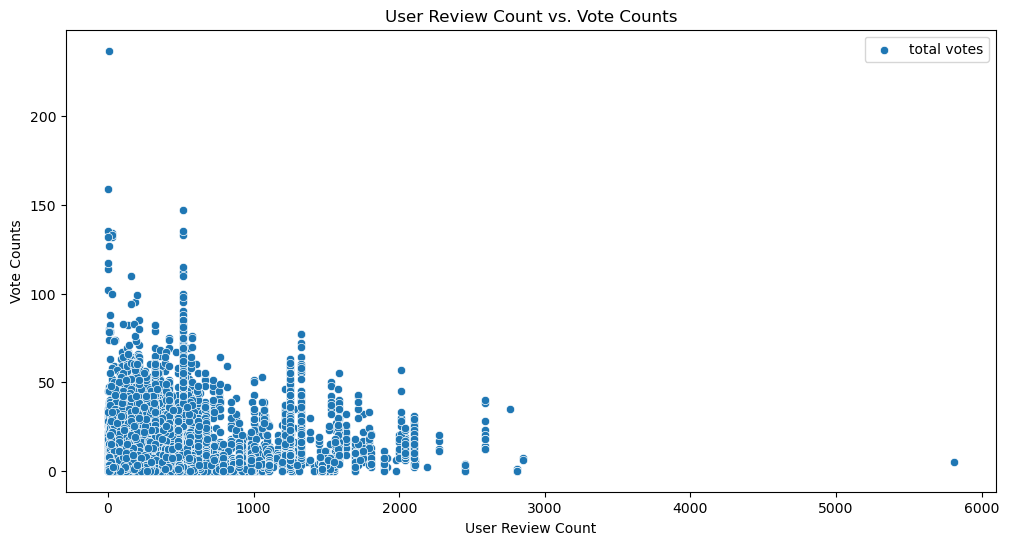

In [45]:
# Exploring User Activity
plt.figure(figsize=(12, 6))
sns.scatterplot(data=combined_df, x='review_count', y='total_votes', label='total votes')
plt.title('User Review Count vs. Vote Counts')
plt.xlabel('User Review Count')
plt.ylabel('Vote Counts')
plt.legend()
plt.show()

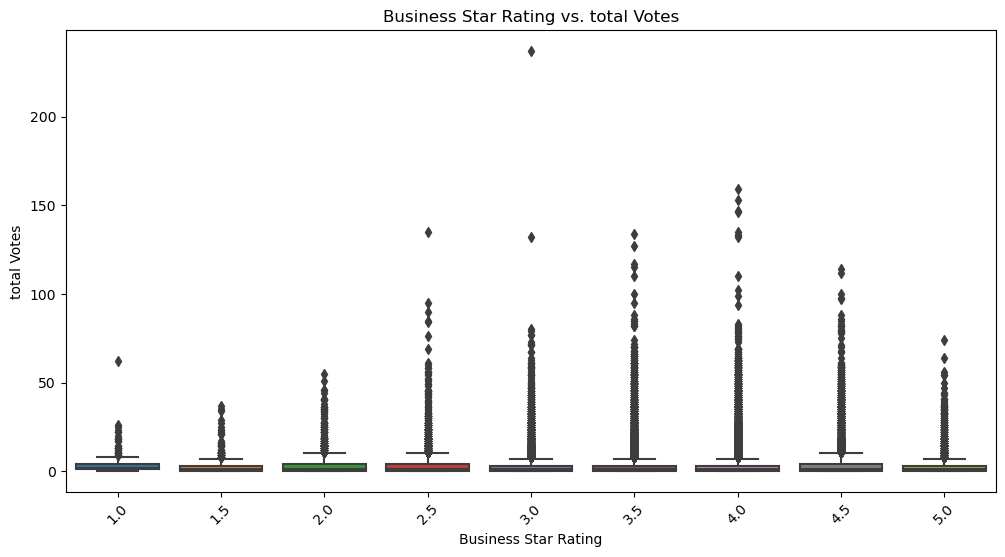

In [46]:
# relationship between business star rating and total votes
plt.figure(figsize=(12, 6))
sns.boxplot(x='business_stars', y='total_votes', data=combined_df)
plt.title('Business Star Rating vs. total Votes')
plt.xlabel('Business Star Rating')
plt.ylabel('total Votes')
plt.xticks(rotation=45)
plt.show()




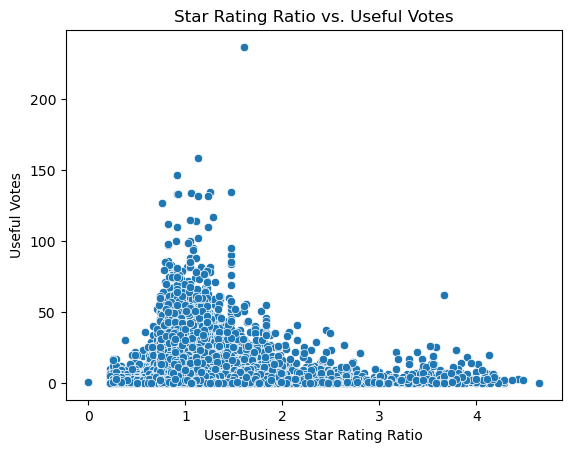

In [47]:
# Interactive Feature: User-Business Star Rating Ratio

combined_df['star_rating_ratio'] = combined_df['average_stars'] / combined_df['business_stars']
sns.scatterplot(data=combined_df, x='star_rating_ratio', y='total_votes')
plt.title('Star Rating Ratio vs. Useful Votes')
plt.xlabel('User-Business Star Rating Ratio')
plt.ylabel('Useful Votes')
plt.show()

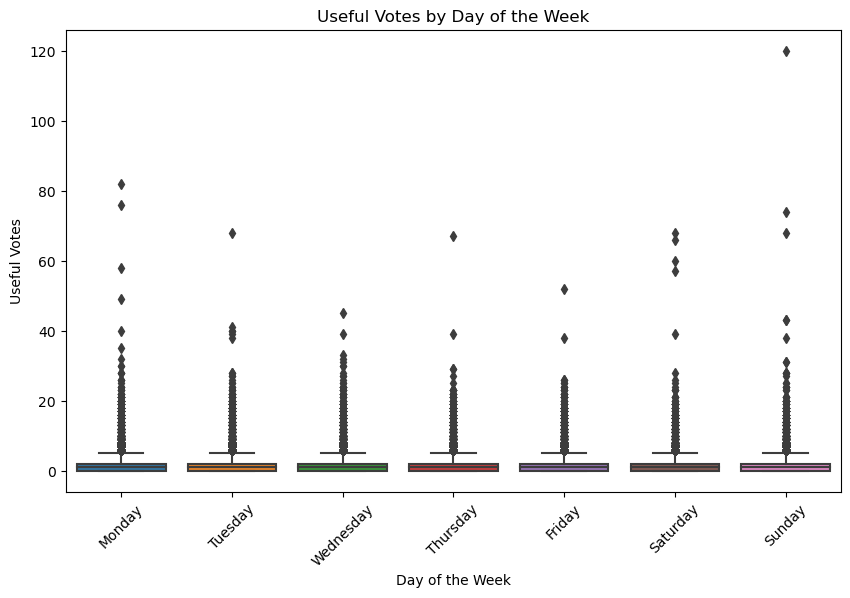

In [48]:
# Convert 'date' to datetime and extract day of the week and hour
combined_df['date'] = pd.to_datetime(combined_df['date'])
combined_df['day_of_week'] = combined_df['date'].dt.day_name()

# Day of the Week Analysis, x-axis is ordered by the day of the week
plt.figure(figsize=(10, 6))
sns.boxplot(x='day_of_week', y='useful_votes', data=combined_df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Useful Votes by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Useful Votes')
plt.xticks(rotation=45)
plt.show()



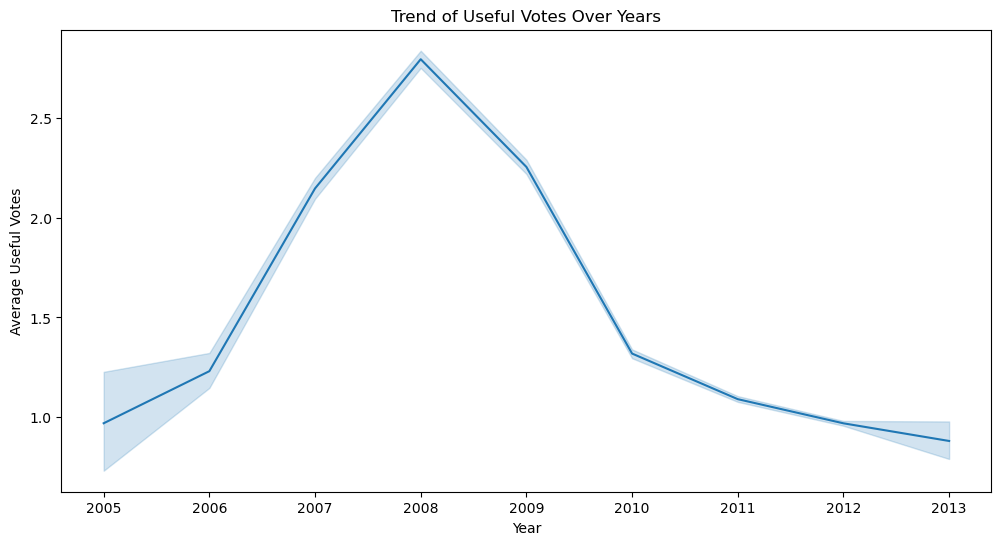

In [49]:
# Temporal Trend Analysis (Year and Month)
combined_df['year'] = combined_df['date'].dt.year
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='useful_votes', data=combined_df)
plt.title('Trend of Useful Votes Over Years')
plt.xlabel('Year')
plt.ylabel('Average Useful Votes')
plt.show()

# Seasonal Analysis (example)
# This requires categorizing months into seasons

/var/folders/nd/hjy37y_d24d_62qk40rb90400000gn/T/ipykernel_1128/3918500094.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  spearman_corr = combined_df.corr(method='spearman')


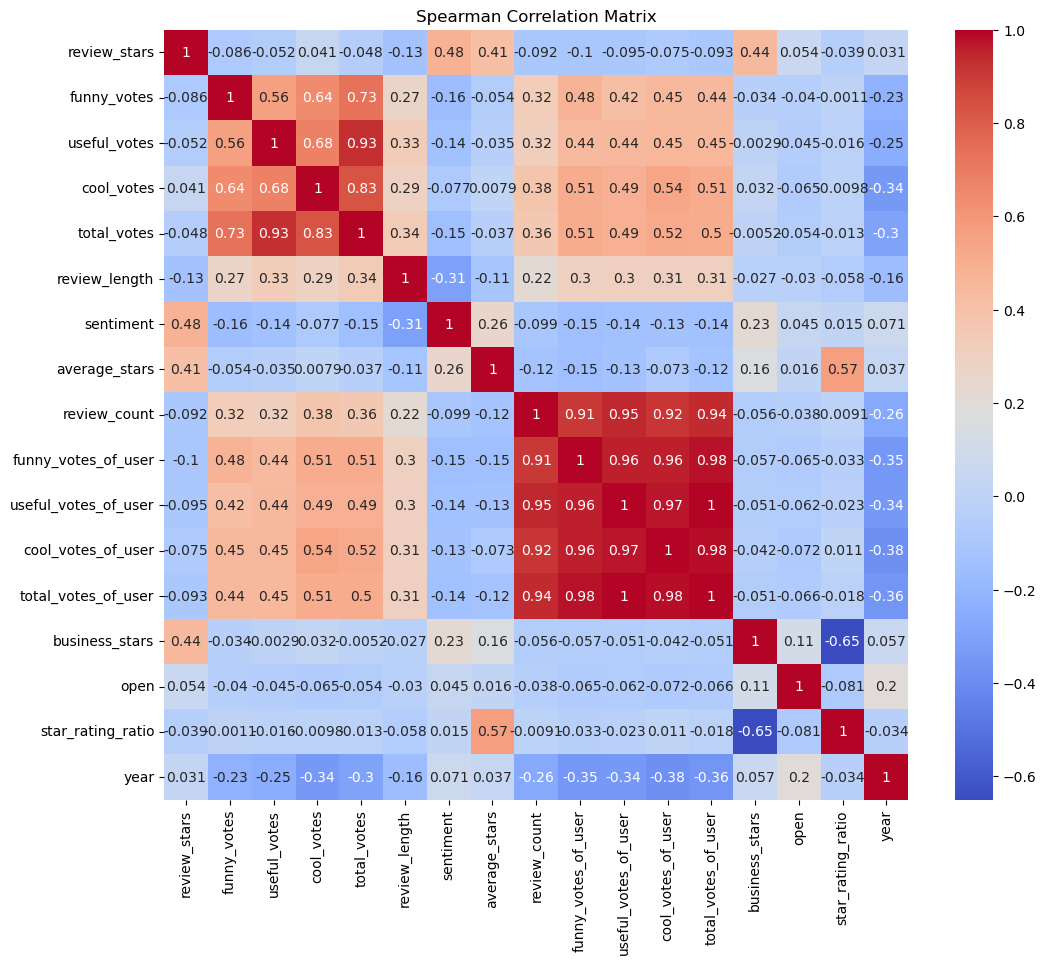

In [50]:
# Advanced Correlation Matrix using Spearman's rank correlation
spearman_corr = combined_df.corr(method='spearman')
plt.figure(figsize=(12, 10))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm')
plt.title('Spearman Correlation Matrix')
plt.show()

In [51]:
# Sort the reviews by total votes in descending order
top_reviews = review_df.sort_values(by='total_votes', ascending=False).head(100)

# Calculate the percentage of each vote type
top_reviews['funny_percentage'] = (top_reviews['funny_votes'] / top_reviews['total_votes']) * 100
top_reviews['useful_percentage'] = (top_reviews['useful_votes'] / top_reviews['total_votes']) * 100
top_reviews['cool_percentage'] = (top_reviews['cool_votes'] / top_reviews['total_votes']) * 100

# Display the results
median_funny = top_reviews['funny_percentage'].median()
median_useful = top_reviews['useful_percentage'].median()
median_cool = top_reviews['cool_percentage'].median()

# Display the results
print(f"Median Funny Vote Percentage: {median_funny}%")
print(f"Median Useful Vote Percentage: {median_useful}%")
print(f"Median Cool Vote Percentage: {median_cool}%")


Median Funny Vote Percentage: 35.98273691782053%
Median Useful Vote Percentage: 33.161512027491405%
Median Cool Vote Percentage: 31.385927505330493%


In [52]:
#calculate the total number of votes in top 100 reviews
total_votes = top_reviews['total_votes'].sum()
print(f"Total Votes: {total_votes}")
#calculate the total number of funny votes in top 100 reviews
total_funny_votes = top_reviews['funny_votes'].sum()
print(f"Total Funny Votes: {total_funny_votes}")
#calculate the total number of useful votes in top 100 reviews
total_useful_votes = top_reviews['useful_votes'].sum()
print(f"Total Useful Votes: {total_useful_votes}")
#calculate the total number of cool votes in top 100 reviews
total_cool_votes = top_reviews['cool_votes'].sum()
print(f"Total Cool Votes: {total_cool_votes}")

#calculate percentage
print(f"Percentage of Funny Votes: {total_funny_votes / total_votes * 100}%")
print(f"Percentage of Useful Votes: {total_useful_votes / total_votes * 100}%")
print(f"Percentage of Cool Votes: {total_cool_votes / total_votes * 100}%")



Total Votes: 8973
Total Funny Votes: 2528
Total Useful Votes: 3261
Total Cool Votes: 3184
Percentage of Funny Votes: 28.1734091162376%
Percentage of Useful Votes: 36.342360414577065%
Percentage of Cool Votes: 35.484230469185334%


In [53]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


/var/folders/nd/hjy37y_d24d_62qk40rb90400000gn/T/ipykernel_1128/901031094.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pca_df.fillna(pca_df.mean(), inplace=True)


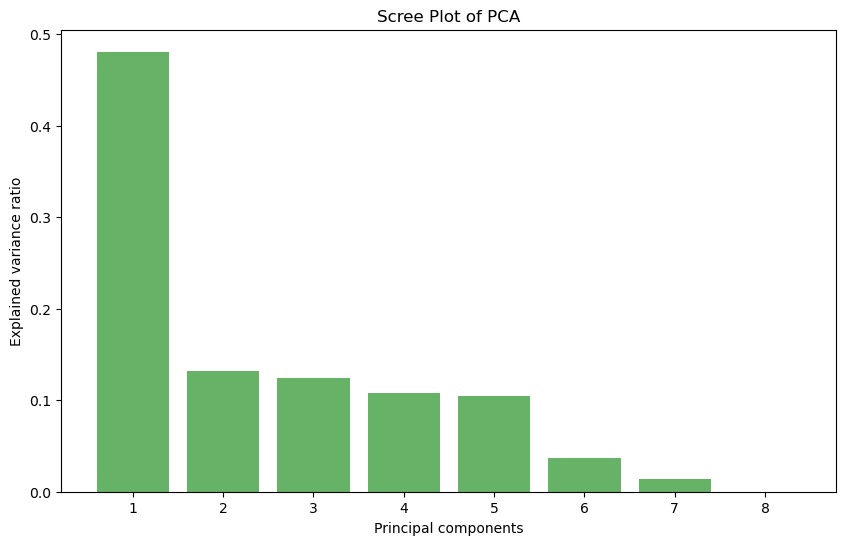

In [54]:
# Assuming your combined DataFrame (combined_df) from your code is available

# Selecting relevant numeric features for PCA
# Update this list based on the features you have prepared
numeric_features = ['review_length', 'total_votes', 'review_count', 'average_stars', 'open', 'funny_votes', 'useful_votes', 'cool_votes']
pca_df = combined_df[numeric_features]

# Handling missing values - you might choose a different strategy
pca_df.fillna(pca_df.mean(), inplace=True)

# Standardizing the features
scaler = StandardScaler()
pca_df_scaled = scaler.fit_transform(pca_df)

# Performing PCA
pca = PCA(n_components=len(numeric_features))
pca.fit(pca_df_scaled)

# Explained variance ratio for each principal component
explained_variance = pca.explained_variance_ratio_

# Scree plot
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(numeric_features) + 1), explained_variance, alpha=0.6, color='g', label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.xticks(range(1, len(numeric_features) + 1))
plt.title('Scree Plot of PCA')
plt.show()